In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import median_absolute_error as mae

In [22]:
df = pd.read_csv(r'housing_train.csv', encoding = "latin1")
df1 = df.copy()
df1

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,Ã¢ÂÂ BERKLEY HOUSE Ã¢ÂÂ Voted #1 BEST Co...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


In [23]:
df1.drop(["id", "url", "region_url", "image_url"], inplace = True, axis=1)

In [24]:
df1.drop(["description"], inplace = True, axis=1)

In [25]:
df1

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,columbus,0,apartment,1061,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,40.0495,-83.0669,oh
265186,columbus,1069,apartment,1020,2,1.5,1,1,1,0,0,0,w/d hookups,detached garage,39.8408,-83.0804,oh
265187,columbus,1507,apartment,1660,2,1.5,1,1,1,0,0,0,NaN,NaN,40.0564,-83.0417,oh
265188,columbus,1001,apartment,1220,3,1.5,1,1,1,0,0,0,w/d hookups,off-street parking,40.0451,-82.4564,oh


In [26]:
df1.dtypes

region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
lat                        float64
long                       float64
state                       object
dtype: object

In [27]:
cat = ["region", "type", "laundry_options", "parking_options", "state"]
for x in cat:
    print((df1[x].value_counts()).count())

298
12
5
7
38


In [28]:
(df1.groupby(by=["region"]).count()).sort_values(by=["price"])

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
region,,,,,,,,,,,,,,,,
east oregon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
texoma,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
northwest OK,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,2
zanesville / cambridge,3,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3
kansas city,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
denver,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,1831,1377,2582,2582,2671
omaha / council bluffs,2727,2727,2727,2727,2727,2727,2727,2727,2727,2727,2727,2372,2035,2719,2719,2727
fayetteville,3652,3652,3652,3652,3652,3652,3652,3652,3652,3652,3652,2777,1560,3636,3636,3652


In [29]:
df1.isna().sum()

region                         0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
lat                         1419
long                        1419
state                          1
dtype: int64

In [30]:
df1.dropna(axis=0, inplace = True)

In [33]:
df2 = df1.drop(["region"], axis=1)

In [34]:
df2

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265183,870,apartment,933,2,2.0,1,1,1,0,0,0,w/d hookups,street parking,39.8971,-82.8957,oh
265184,929,apartment,728,1,1.0,1,1,1,1,0,0,w/d in unit,off-street parking,39.9709,-82.9241,oh
265185,0,apartment,1061,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,40.0495,-83.0669,oh
265186,1069,apartment,1020,2,1.5,1,1,1,0,0,0,w/d hookups,detached garage,39.8408,-83.0804,oh


In [41]:
le = LabelEncoder()
df2 = df2.apply(le.fit_transform)

In [42]:
df2

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,893,0,1702,3,3,1,1,1,0,0,0,1,5,6395,15780,1
1,818,0,1116,3,3,1,1,1,0,0,0,1,4,6311,15720,1
2,523,0,930,1,2,1,1,1,0,0,0,1,5,6395,15780,1
3,498,0,724,1,1,1,1,1,0,0,0,1,5,6395,15780,1
4,483,0,844,2,1,1,1,1,0,0,0,1,5,6395,15780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265183,568,0,730,2,3,1,1,1,0,0,0,3,5,19605,20136,35
265184,627,0,525,1,1,1,1,1,1,0,0,4,4,19777,20124,35
265185,0,0,858,2,3,1,1,1,0,0,0,4,2,20064,19983,35
265186,767,0,817,2,2,1,1,1,0,0,0,3,2,19467,19966,35


In [43]:
import torch

In [48]:
X = np.array(df2.iloc[:, 1:])
Y = np.array(df2["price"])
X = X.astype("float32")
Y = Y.astype("float32")

In [49]:
from sklearn.model_selection import train_test_split
train_x_tr, X_test, train_y_tr, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
train_x_tr=torch.from_numpy(train_x_tr)
train_y_tr=torch.from_numpy(train_y_tr)
test_x_tr = torch.from_numpy(X_test)
test_y_tr = torch.from_numpy(y_test)
train_x_tr

tensor([[0.0000e+00, 8.4400e+02, 2.0000e+00,  ..., 3.3671e+04, 7.4210e+03,
         2.8000e+01],
        [6.0000e+00, 1.5950e+03, 3.0000e+00,  ..., 2.1780e+03, 2.0694e+04,
         9.0000e+00],
        [0.0000e+00, 5.9700e+02, 1.0000e+00,  ..., 1.8934e+04, 2.7389e+04,
         8.0000e+00],
        ...,
        [0.0000e+00, 5.3600e+02, 3.0000e+00,  ..., 1.0626e+04, 2.4986e+04,
         2.7000e+01],
        [0.0000e+00, 8.2800e+02, 2.0000e+00,  ..., 1.0234e+04, 6.1700e+03,
         3.2000e+01],
        [0.0000e+00, 4.9700e+02, 1.0000e+00,  ..., 3.1579e+04, 1.0226e+04,
         2.3000e+01]])

In [51]:
lossl = []

In [52]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        #self.linear_yq1_output = torch.nn.Linear(30,1)
        #self.linear_yq2_output = torch.nn.Linear(30,1)
        #self.linear_yq3_output = torch.nn.Linear(30,1)

        self.net = torch.nn.Sequential(
        torch.nn.Linear(15, 30),
        torch.nn.LeakyReLU(),
        #torch.nn.Tanh(),
        
        torch.nn.Linear(30, 30),
        torch.nn.LeakyReLU(),
            
        torch.nn.Linear(30,3)

        #torch.nn.Tanh(),
        )

    def forward(self,x):
        return self.net(x)
    
modelA = MyModel()
modelA = modelA.cuda()

optimizer = torch.optim.Adam(params=modelA.parameters(), lr=0.005)

def criterion(input, target):
    ## Other Losses
    # Normal loss
    #loss = (((input[0] - target)/torch.exp(input[1]))**2+input[1]).mean()
    # Laplace loss
    #loss = (torch.abs((input[0] - target)/torch.exp(input[1]))+input[1]).mean()
    # t-distribution loss
    #nu = 3
    #loss = ((nu + 1)/2*torch.log(1+((input[0] - target)/torch.exp(input[1]))**2/nu)+input[1]).mean()
    # print(input, target)

    ## Quanile Loss
    q1 = 0.20
    q2 = 0.5
    q3 = 0.80
    

    ## Keras quantile loss, https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/    
    #e = y_p-y    
    #return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

    ## Quantile Loss
    ## for q1, q2, q3
    #print(input.shape)
    #print(input[:,0:1].shape)
#     print(yqs.shape)
    e1 = input[:, 0] - target # !!! if input[:,0]  -> shape = (1000,)
    e2 = input[:, 1] - target
    e3 = input[:, 2] - target
    eq1 = torch.max(q1*e1, (q1-1)*e1)
    eq2 = torch.max(q2*e2, (q2-1)*e2)
    eq3 = torch.max(q3*e3, (q3-1)*e3)
    
    #eq1 = torch.max(0.05*e1, (0.05-1)*e1)
    #eq2 = torch.max(0.5*e2, (0.5-1)*e2)
    #eq3 = torch.max(0.95*e3, (0.95-1)*e3)

    loss = (eq1 + eq2 + eq3).mean()

    return loss
    
train_x_tr = train_x_tr.cuda()    
train_y_tr = train_y_tr.cuda()

for step in range(6000):
    #yq1, yq2, yq3 = model(x)
    #loss = criterion(input=(yq1, yq2, yq3), target=y)
    yqs = modelA(train_x_tr)
    loss = criterion(input=yqs, target =train_y_tr)
    lossl.append(loss)
    #print(yqs.shape, train_y_tr.shape)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (step+1) % 1000 == 0:
        """
        Show your intermediate results
        """
        print('epoch {} loss={:.4}'.format(step+1, loss.data.item()))
        pass

epoch 1000 loss=378.9
epoch 2000 loss=350.6
epoch 3000 loss=357.4
epoch 4000 loss=317.1
epoch 5000 loss=312.9
epoch 6000 loss=301.8


In [53]:
y_pred = modelA(test_x_tr.cuda())

In [54]:
y_pred

tensor([[ 848.5710,  703.8242,  556.4154],
        [ 825.1780,  619.5530,  433.2441],
        [1714.8408, 1314.5734,  924.6964],
        ...,
        [1893.1327, 1410.0205,  960.6459],
        [ 620.7736,  527.3572,  414.8754],
        [ 862.5544,  692.4559,  556.5978]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [55]:
test_y_tr

tensor([ 373.,  537., 1205.,  ..., 2079.,  413.,  658.])

In [56]:
y_pred_array = np.array(test_y_tr)
y_pred_array

array([ 373.,  537., 1205., ..., 2079.,  413.,  658.], dtype=float32)

In [57]:
predictions = y_pred.detach().cpu().numpy()
predictions

array([[ 848.57104,  703.82416,  556.4154 ],
       [ 825.178  ,  619.553  ,  433.24414],
       [1714.8408 , 1314.5734 ,  924.6964 ],
       ...,
       [1893.1327 , 1410.0205 ,  960.64594],
       [ 620.7736 ,  527.35724,  414.87537],
       [ 862.5544 ,  692.45593,  556.5978 ]], dtype=float32)

In [58]:
predictions_mean = predictions[:, 1]

In [59]:
predictions_mean

array([ 703.82416,  619.553  , 1314.5734 , ..., 1410.0205 ,  527.35724,
        692.45593], dtype=float32)

In [60]:
y_pred_array

array([ 373.,  537., 1205., ..., 2079.,  413.,  658.], dtype=float32)

In [61]:
lossl = [x.detach().cpu().numpy() for x in lossl]

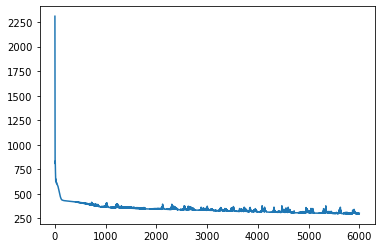

In [62]:
lossl = np.array(lossl)
ind = [i for i in range(1, lossl.shape[0]+1)]
plt.plot(ind, lossl)

In [65]:
mae(predictions_mean, y_pred_array)

150.48083